# Guides to LiDAR (Part 1b - Manage, Edit, and Analyze LiDAR)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Manage-LiDAR-data" data-toc-modified-id="1.-Manage-LiDAR-data-1">1. Manage LiDAR data</a></span><ul class="toc-item"><li><span><a href="#1.1-Create-LAS-Dataset" data-toc-modified-id="1.1-Create-LAS-Dataset-1.1">1.1 Create LAS Dataset</a></span><ul class="toc-item"><li><span><a href="#Convert-LAS" data-toc-modified-id="Convert-LAS-1.1.1">Convert LAS</a></span></li><li><span><a href="#Create-LAS-Dataset" data-toc-modified-id="Create-LAS-Dataset-1.1.2">Create LAS Dataset</a></span></li><li><span><a href="#LAS-Dataset-File-structure" data-toc-modified-id="LAS-Dataset-File-structure-1.1.3">LAS Dataset File structure</a></span></li></ul></li><li><span><a href="#1.2-Share-LAS-Dataset-as-scene-layer-packages" data-toc-modified-id="1.2-Share-LAS-Dataset-as-scene-layer-packages-1.2">1.2 Share LAS Dataset as scene layer packages</a></span></li></ul></li><li><span><a href="#2.-Edit-LAS-Dataset" data-toc-modified-id="2.-Edit-LAS-Dataset-2">2. Edit LAS Dataset</a></span><ul class="toc-item"><li><span><a href="#Edit-the-classification" data-toc-modified-id="Edit-the-classification-2.1">Edit the classification</a></span></li></ul></li><li><span><a href="#3.-Analyze-the-LAS-Dataset" data-toc-modified-id="3.-Analyze-the-LAS-Dataset-3">3. Analyze the LAS Dataset</a></span><ul class="toc-item"><li><span><a href="#3.1-Create-LAS-Statistics" data-toc-modified-id="3.1-Create-LAS-Statistics-3.1">3.1 Create LAS Statistics</a></span><ul class="toc-item"><li><span><a href="#Understanding-statistics" data-toc-modified-id="Understanding-statistics-3.1.1">Understanding statistics</a></span></li><li><span><a href="#LAS-Height-Metrics" data-toc-modified-id="LAS-Height-Metrics-3.1.2">LAS Height Metrics</a></span></li><li><span><a href="#Point-File-Information" data-toc-modified-id="Point-File-Information-3.1.3">Point File Information</a></span></li></ul></li><li><span><a href="#3.2-Convert-to-Raster" data-toc-modified-id="3.2-Convert-to-Raster-3.2">3.2 Convert to Raster</a></span><ul class="toc-item"><li><span><a href="#LAS-Point-Statistics-As-Raster" data-toc-modified-id="LAS-Point-Statistics-As-Raster-3.2.1">LAS Point Statistics As Raster</a></span></li><li><span><a href="#LAS-Dataset-To-Raster" data-toc-modified-id="LAS-Dataset-To-Raster-3.2.2">LAS Dataset To Raster</a></span></li></ul></li><li><span><a href="#3.3-Data-area-delineation-from-LiDAR-points" data-toc-modified-id="3.3-Data-area-delineation-from-LiDAR-points-3.3">3.3 Data area delineation from LiDAR points</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Rasterize-the-LiDAR-points" data-toc-modified-id="Step-1:-Rasterize-the-LiDAR-points-3.3.1">Step 1: Rasterize the LiDAR points</a></span></li><li><span><a href="#Step-2:-Assign-one-value-to-all-data-cells" data-toc-modified-id="Step-2:-Assign-one-value-to-all-data-cells-3.3.2">Step 2: Assign one value to all data cells</a></span></li><li><span><a href="#Step-3:-Fill-small-NoData-areas" data-toc-modified-id="Step-3:-Fill-small-NoData-areas-3.3.3">Step 3: Fill small NoData areas</a></span></li><li><span><a href="#Step-4:-Reduce-the-overall-extent-of-data-cells" data-toc-modified-id="Step-4:-Reduce-the-overall-extent-of-data-cells-3.3.4">Step 4: Reduce the overall extent of data cells</a></span></li><li><span><a href="#Step-5:-Vectorize-the-raster" data-toc-modified-id="Step-5:-Vectorize-the-raster-3.3.5">Step 5: Vectorize the raster</a></span></li><li><span><a href="#Step-6:-Remove-any-remaining-small-holes" data-toc-modified-id="Step-6:-Remove-any-remaining-small-holes-3.3.6">Step 6: Remove any remaining small holes</a></span></li></ul></li></ul></li><li><span><a href="#4.-Summary" data-toc-modified-id="4.-Summary-4">4. Summary</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

In <a href="lidar_basics_part1.ipynb">Part 1</a>, we have learned the basic concepts of LiDAR, e.g. what are LiDAR, first return, point clouds and LAS Datasets, and explored how the LiDAR point clouds can be viewed in Scene Viewer in <a href="lidar_basics_web_scene_part1a.ipynb">Part 1(a)</a>. Now this notebook is to cover commonly seen use cases with LAS datasets, such as managing, editing, analyzing, visualizing and sharing LiDAR data. 

## 1. Manage LiDAR data

### 1.1 Create LAS Dataset

#### Convert LAS

Converts LAS files between different compression methods, file versions, and point record formats. Please check out the <a href="https://pro.arcgis.com/en/pro-app/tool-reference/conversion/convert-las.htm">help doc</a> of the tool for more info.

In [1]:
import arcpy
from arcpy import env
import os

In [11]:
# Root folder of the project
root_folder = r"<Root Folder>\NEON_lidar-point-cloud-line"

# Sub folder of the .laz files
sub_folder = os.path.join(root_folder, r"2017\FullSite\D17\2017_TEAK_2\L1\DiscreteLidar\ClassifiedPointCloud")

# Relative path of the created LAS Dataset
relative_lasd_path = '2017_unclassified_collection/2017_Survey_Collection.lasd'

In [3]:
env.workspace = root_folder

The arcpy tool to be used:
```
ConvertLas(in_las, target_folder, {file_version}, {point_format}, {compression}, {las_options}, {out_las_dataset})
```
some of its parameters:
  - `file_version`: The LAS file version of the output files
    - SAME_AS_INPUT —The output file version will be the same as the input. This is the default.
    - 1.0 —The base version for the LAS format which supported 256 class codes.
    - 1.1 —The output file version will be 1.1. Class codes were reduced to 32, but support for classification flags was added.
    - 1.2 —The output file version will be 1.2. Support for red-green-blue (RGB) color channels and GPS time was added.
    - 1.3 —The output file version will be 1.3. Storage of lidar waveform data for point record formats that are not supported in the ArcGIS platform was added.
    - 1.4 — The output file version will be 1.4. Support for coordinate system definition using Well Known Text (WKT) convention, 256 class codes, up to 15 discrete returns per pulse, higher precision scan angle, and overlap classification flag was added.
  - `point_format`: Specifies the point record format of the output LAS files. The available options will vary based on the output LAS file version.
    - 0 —The base type for storing discrete LAS points that supports attributes such as lidar intensity, return values, scan angle, scan direction, and edge of flight line.
    - 1 —Adds GPS time to the attributes supported in point format 0.
    - 2 —Adds RGB values to the attributes supported in point format 0.
    - 3 —Adds RGB values and GPS time to the attributes supported in point format 0.
    - 6 —The preferred base type for storing discrete LAS points in LAS file version 1.4.
    - 7 —Adds RGB values to the attributes supported in point format 6.
    - 8 —Adds RGB and near-infrared values to the attributes supported in point format 6.
  

In [3]:
# the 1st laz file
arcpy.conversion.ConvertLas(in_las = os.path.join(sub_folder, "NEON_D17_TEAK_DP1_324000_4103000_classified_point_cloud.laz"), 
                            target_folder = '2017_unclassified_collection', 
                            file_version = '1.4', 
                            point_format = 7, 
                            compression = 'NO_COMPRESSION',
                            las_options = ['REMOVE_VLR', 'REMOVE_EXTRA_BYTES', 'REARRANGE_POINTS'], 
                            out_las_dataset = relative_lasd_path)

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_Survey_Collection.lasd'>


In [4]:
# the 2nd laz file
arcpy.conversion.ConvertLas(in_las = os.path.join(sub_folder, "NEON_D17_TEAK_DP1_323000_4103000_classified_point_cloud.laz"), 
                            target_folder = '2017_unclassified_collection', 
                            file_version = '1.4', 
                            point_format = 7, 
                            compression = 'NO_COMPRESSION',
                            las_options = ['REMOVE_VLR', 'REMOVE_EXTRA_BYTES', 'REARRANGE_POINTS'], 
                            out_las_dataset = relative_lasd_path)

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_Survey_Collection.lasd'>


#### Create LAS Dataset

Creates a LAS dataset referencing one or more LAS files and optional surface constraint features. Please check out the <a href="https://desktop.arcgis.com/en/arcmap/10.3/tools/data-management-toolbox/create-las-dataset.htm#I_ESRI_TOOLILLUSTRATION_1EDBA9318EA1498A95C6EBC38D6A10E2">help doc</a> of the tool for more info.

The arcpy tool to be used:
```
CreateLasDataset(input, out_las_dataset, {folder_recursion}, {in_surface_constraints}, {spatial_reference}, {compute_stats}, {relative_paths}, create_las_prj)
```
some of its parameters:
  - `input`: The LAS files and folders containing LAS files that will be referenced by the LAS dataset. This information can be supplied as a string containing all the input data or a list of strings containing specific data elements (for example, "lidar1.las; lidar2.las; folder1; folder2" or ["lidar1.las", "lidar2.las", "folder1", "folder2"]).
  - `out_las_dataset`: The LAS dataset that will be created.
  - `folder_recursion`: Specifies whether lidar data residing in the subdirectories of an input folder will be added to the LAS dataset.
    - NO_RECURSION —Only lidar files found in an input folder will be added to the LAS dataset. This is the default.
    - RECURSION —All LAS files residing in the subdirectories of an input folder will be added to the LAS dataset.
  - `compute_stats`: Specifies whether statistics for the LAS files will be computed and a spatial index generated for the LAS dataset. The presence of statistics allows the LAS dataset layer's filtering and symbology options to only show LAS attribute values that exist in the LAS files. A .lasx auxiliary file is created for each LAS file.
    - COMPUTE_STATS —Statistics will be computed.
    - NO_COMPUTE_STATS —Statistics will not be computed. This is the default.
    
In order to compose the string of LAS files for the first argument `input`, we are going to use `glob` in extracting the file paths.

In [ ]:
import glob

las_list_str = ""
for name in glob.glob(os.path.join(root_folder, "2017_unclassified_collection") + '/*.las'):
    las_list_str += name + ";"
las_list_str = las_list_str[:-1]

Or use the code block below
```
las_list_str = ""
for root, dirs, files in os.walk(os.path.join(root_folder, "2017_unclassified_collection")):
    for file in files:
        if file.endswith(".las"):
            p=os.path.join(root,file)
            las_list_str += os.path.abspath(p) + ";"
las_list_str = las_list_str[:-1]
```

In [19]:
absolute_lasd_path = os.path.join(root_folder, relative_lasd_path)

In [1]:
arcpy.CreateLasDataset_management(input = las_list_str, 
                                  out_las_dataset = absolute_lasd_path, 
                                  folder_recursion = "RECURSION",
                                  compute_stats="COMPUTE_STATS")

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_Survey_Collection.lasd'>


In [16]:
print(arcpy.GetMessages())

Start Time: Monday, November 11, 2019 2:41:17 PM
Succeeded at Monday, November 11, 2019 2:41:17 PM (Elapsed Time: 0.06 seconds)


With a LAS dataset being created via arcpy, a .lasd file is created and stored on disk. This LAS dataset file is a pointer to LAS files and surface constraints used to construct the LAS dataset. The LAS dataset file does not import lidar point data from LAS files into the LAS dataset file. It only stores reference to LAS files and surface constraints<a href="#References">[5]</a>.

#### LAS Dataset File structure

When a LAS Dataset is created, not only are we seeing a new .lasd file on disk, but also other file types are generated that are associated with a LAS dataset<a href="#References">[5]</a>:

  - `LAS auxiliary file (.lasx)`: A LAS auxiliary file (.lasx) is created for each LAS file when statistics are calculated on a LAS dataset. The LAS auxiliary files contain the statistical information and spatial index for each LAS file.
  - `Projection file (.prj)`: A projection file defines the coordinate system of a LAS file.
  - `Optimized LAS file (.zlas)`: Optimized LAS files (.zlas) are compressed files and are directly usable in ArcGIS 10.2.1 and later via the LAS dataset.


### 1.2 Share LAS Dataset as scene layer packages

A point cloud scene layer package (.slpk file) can be created from LAS, zLAS, LAZ, or LAS dataset input, using the arcpy tool `CreatePointCloudSceneLayerPackage`. Its syntax is shown below:
```
CreatePointCloudSceneLayerPackage(in_dataset, out_slpk, {out_coor_system}, {transform_method}, {attributes}, {point_size_m}, {xy_max_error_m}, {z_max_error_m}, {in_coor_system}, {scene_layer_version})
```
Parameters include:
  - `point_size_m`: The point size of the lidar data. For airborne lidar data, the default of 0 or a value close to the average point spacing is usually best. For terrestrial lidar data, the point size should match the desired point spacing for the areas of interest. Values are expressed in meters. The default of 0 will automatically determine the best value for the input dataset.
  - `xy_max_error_m`: The maximum x,y error tolerated. A higher tolerance will result in better data compression and more efficient data transfer. Values are expressed in meters. The default is 0.1.
  - `z_max_error_m`: The maximum z-error tolerated. A higher tolerance will result in better data compression and more efficient data transfer. Values are expressed in meters. The default is 0.1.
  - `scene_layer_version`: The Indexed 3D Scene Layer (I3S) version of the resulting point cloud scene layer package. Specifying a version supports backward compatibility and allows scene layer packages to be shared with earlier versions of ArcGIS.
    - 1.X — Supported in all ArcGIS clients. This is the default.
    - 2.X — Supported in ArcGIS Pro 2.1.2 or later and can be published to ArcGIS Online and ArcGIS 10.6.1 or later.

In [18]:
from arcgis.gis import GIS
portal_gis = GIS("https://pythonapi.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123", verify_cert=False)

In [ ]:
arcpy.management.CreatePointCloudSceneLayerPackage(in_dataset = "2017_Survey_Collection1.lasd", 
                                                   out_slpk = r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection1.slpk", 
                                                   out_coor_system = "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],VERTCS['EGM96_Geoid',VDATUM['EGM96_Geoid'],PARAMETER['Vertical_Shift',0.0],PARAMETER['Direction',1.0],UNIT['Meter',1.0]];-400 -400 1000000000;-100000 10000;-100000 10000;8.98315284119522E-09;0.001;0.001;IsHighPrecision", None, "INTENSITY;RGB;CLASS_CODE;RETURNS", 
                                                   point_size_m = 0, 
                                                   xy_max_error_m = 0.01, 
                                                   z_max_error_m = 0.01, 
                                                   in_coor_system = None, 
                                                   scene_layer_version = "1.x")

Then use `SharePackage` to share a package by uploading to ArcGIS Online or ArcGIS Enterprise, with a syntax as:
```
SharePackage(in_package, username, password, summary, tags, {credits}, {public}, {groups}, {organization})
```

In [ ]:
arcpy.management.SharePackage(in_package = r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection1.slpk", 
                              username = '', password = "*****", summary = "slpk", tags = "slpk", credits = '', 
                              public = "EVERYBODY", groups = None, organization = "MYORGANIZATION")

In [1]:
gis = GIS()

In [2]:
scene_item = gis.content.get("d4da39b458584cbd8bc438ecd9e6fbe6")
scene_item

<Item title:"TEAK_LAS_dataset_web_scene" type:Web Scene owner:arcgis_python>


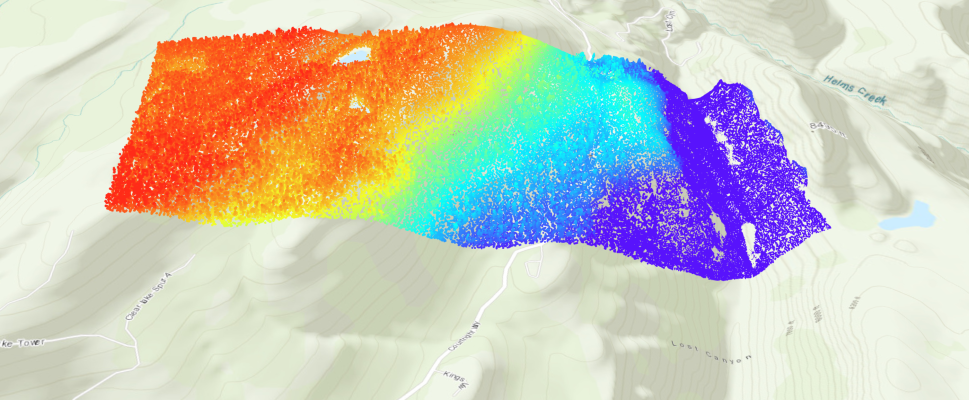

In [8]:
from arcgis.widgets import MapView
mv0 = MapView(item=scene_item, mode="3D")
mv0

In [4]:
mv0.heading, mv0.tilt, mv0.zoom, mv0.extent = (  6.880696709066824,
                                                 59.3502404233768,
                                                 15.39374814553253,
                                                 {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                                                  'xmin': -13246526.340163453,
                                                  'ymin': 4446610.004194932,
                                                  'xmax': -13243002.81329048,
                                                  'ymax': 4448064.504446241})

In [5]:
mv0.legend = True

## 2. Edit LAS Dataset

### Edit the classification

You cannot create new LAS files based on classification code changes in ArcGIS. You can only edit the classification currently defined in the LAS files. All changes are permanent when making any modifications to the classification codes in LAS files. If you are conducting any what-if scenarios or do not want changes to be permanent, make sure to work on a copy of the LAS files, not the originals <a href="#References">[6]</a>.

The following two geoprocessing tools allow you to change the lidar point classification for LAS files referenced by a LAS dataset:

 - <a href="https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/change-las-class-codes.htm">Change LAS Class Codes</a>
 - <a href="https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/set-las-class-codes-using-features.htm">Set LAS Class Codes Using Features</a>

## 3. Analyze the LAS Dataset

### 3.1 Create LAS Statistics

The tool `LasDatasetStatistics` is used to calculate or update statistics for a LAS dataset and generates an optional statistics report. Please check out the <a href="https://pro.arcgis.com/en/pro-app/tool-reference/data-management/las-dataset-statistics.htm">help doc</a> of the tool for more info.

In [2]:
arcpy.management.LasDatasetStatistics(in_las_dataset = absolute_lasd_path, 
                                      calculation_type = "SKIP_EXISTING_STATS", summary_level="DATASET", 
                                      decimal_separator="DECIMAL_POINT", delimiter="SPACE", 
                                      out_file="2017_LAS_summary.txt")

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_LAS_summary.txt'>


In [22]:
print(arcpy.GetMessages())

Start Time: Monday, November 11, 2019 2:58:11 PM
Succeeded at Monday, November 11, 2019 2:58:11 PM (Elapsed Time: 0.10 seconds)


In [31]:
import pandas as pd

df = pd.read_csv(os.path.join(root_folder, '2017_LAS_summary.txt'), sep=" ")
df.columns = ["Item", "Category", "Pt_Cnt", "Percent", "Z_Min", "Z_Max", "Intensity_Min", "Intensity_Max", \
              "Synthetic_Pt_Cnt", "Range_Min", "Range_Max"]
df

Item    Category      Pt_Cnt  Percent    Z_Min    Z_Max  \
0                First     Returns   8840741.0    75.68  2324.24  3279.71   
1               Second     Returns   1975944.0    16.92  1382.55  2753.32   
2                Third     Returns    705281.0     6.04  1489.06  2750.23   
3               Fourth     Returns    159013.0     1.36  1602.09  2742.90   
4                 Last     Returns   8840354.0    75.68  1382.55  2756.37   
5               Single     Returns   6864405.0    58.77  2324.24  2756.37   
6        First_of_Many     Returns   1976336.0    16.92  2327.15  3279.71   
7         Last_of_Many     Returns   1975949.0    16.92  1382.55  2752.96   
8                  All     Returns  11680979.0   100.00  1382.55  3279.71   
9       1_Unclassified  ClassCodes    899705.0     7.70  2324.76  2736.24   
10            2_Ground  ClassCodes   6666425.0    57.07  2324.24  2725.12   
11   5_High_Vegetation  ClassCodes   4084572.0    34.97  2327.95  2756.37   
12          6_Building  ClassCodes     30188.0     0.26  2377.89  2587.05   
13  7_Low_Point(noise)  ClassCodes        89.0     0.00  1382.55  3279.71   
14           Return_No  Attributes         NaN      NaN      NaN      NaN   
15           Intensity  Attributes         NaN      NaN      NaN      NaN   
16          Class_Code  Attributes         NaN      NaN      NaN      NaN   
17          Scan_Angle  Attributes         NaN      NaN      NaN      NaN   
18           User_Data  Attributes         NaN      NaN      NaN      NaN   
19        Point_Source  Attributes         NaN      NaN      NaN      NaN   
20                 Red  Attributes         NaN      NaN      NaN      NaN   
21               Green  Attributes         NaN      NaN      NaN      NaN   
22                Blue  Attributes         NaN      NaN      NaN      NaN   
23           Model_Key  ClassFlags         0.0     0.00      NaN      NaN   
24           Synthetic  ClassFlags         0.0     0.00      NaN      NaN   
25            WithHeld  ClassFlags         0.0     0.00      NaN      NaN   
26             Overlap  ClassFlags         0.0     0.00      NaN      NaN   

    Intensity_Min  Intensity_Max  Synthetic_Pt_Cnt  Range_Min  Range_Max  
0             NaN            NaN               NaN        NaN        NaN  
1             NaN            NaN               NaN        NaN        NaN  
2             NaN            NaN               NaN        NaN        NaN  
3             NaN            NaN               NaN        NaN        NaN  
4             NaN            NaN               NaN        NaN        NaN  
5             NaN            NaN               NaN        NaN        NaN  
6             NaN            NaN               NaN        NaN        NaN  
7             NaN            NaN               NaN        NaN        NaN  
8             NaN            NaN               NaN        NaN        NaN  
9             1.0          300.0               0.0        NaN        NaN  
10            1.0          620.0               0.0        NaN        NaN  
11            1.0          129.0               0.0        NaN        NaN  
12            1.0           89.0               0.0        NaN        NaN  
13            0.0        65535.0               0.0        NaN        NaN  
14            NaN            NaN               NaN        1.0        4.0  
15            NaN            NaN               NaN        1.0      620.0  
16            NaN            NaN               NaN        1.0        7.0  
17            NaN            NaN               NaN      -23.0       23.0  
18            NaN            NaN               NaN        0.0      255.0  
19            NaN            NaN               NaN       40.0       47.0  
20            NaN            NaN               NaN        0.0        0.0  
21            NaN            NaN               NaN        0.0        0.0  
22            NaN            NaN               NaN        0.0        0.0  
23            NaN            NaN               NaN        NaN

#### Understanding statistics

Looking at the `Category` column in the previously shown table, we can see these parameters in the statisitic summary:

 - `Returns` — Statistical information is calculated based on the return values for the lidar points of the LAS dataset. The statistics include the point count, the percentage of points, the z minimum, and the z maximum.
 - `Attributes` — Statistical information is calculated from the lidar attributes for the LAS dataset. The statistics include the minimum and maximum values.
 - `Classification Codes` — Statistics are calculated based on the classification completed on the LAS dataset. The statistics include the point count, the percentage of points in each classification code, the z minimum, the z maximum, the minimum intensity, the maximum intensity, and the synthetic point count.
 - `Points With Encoding Flag` — Synthetic, key-point, and withheld flags can be set for each lidar point. These flags can be set along with the classification flag. The statistics include the point count and the percentage of the lidar points in each encoding flag for the LAS dataset.

In [102]:
df[df['Category']=='ClassCodes'][["Item", "Pt_Cnt", "Percent", "Z_Min", "Z_Max", "Intensity_Min", "Intensity_Max"]]

Item     Pt_Cnt  Percent    Z_Min    Z_Max  Intensity_Min  \
9       1_Unclassified   899705.0     7.70  2324.76  2736.24            1.0   
10            2_Ground  6666425.0    57.07  2324.24  2725.12            1.0   
11   5_High_Vegetation  4084572.0    34.97  2327.95  2756.37            1.0   
12          6_Building    30188.0     0.26  2377.89  2587.05            1.0   
13  7_Low_Point(noise)       89.0     0.00  1382.55  3279.71            0.0   

    Intensity_Max  
9           300.0  
10          620.0  
11          129.0  
12           89.0  
13        65535.0

Merely looking at the derived table (shown above), it is significant that majority of the point clouds are classified as `ground` (57.07%), and `high vegetation` (34.97%), and 7.7% of them are listed as `unclassified`. Also, the `Z_Max` value of the `high vegetation` groups is 2756.37 (meters), which is 31.25 meters higher than that of the `ground` groups.

Since the LiDAR intensity can also be affected by "the angle of arrival (scan angle), range, surface composition, roughness, and moisture content" <a href="#References">[6]</a>, the ranges of `[Intensity_Min, Intensity_Max]` will not provide users consistently, reproducible indication to how land cover being classified, but instead just relative references. For instance, the study area at TEAK forest is a foldy terrian with high rises and deep rills, and hence user can expect to see a relative higher intensity values from ground reflectivity.

#### LAS Height Metrics

The tool `LasHeightMetrics` is to be used to calculate statistics about the distribution of elevation measurements of vegetation points captured in LAS data. Find out more, please check out <a href="https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/las-height-metrics.htm">help doc</a> of the tool.

In [ ]:
"""Creates & classifies tiled LAS files.
"""
import tempfile
import math

in_las= las_list_str # The LAS files that need to be tiled
out_folder = os.path.join(root_folder, "2017_unclassified_collection") # folder for LAS files
basename = "ClassifyLas_" # basename for output files
out_lasd = absolute_lasd_path # output LAS dataset

Check to make sure these variables are as printed:
  - `in_las`: `'<Root Folder>\\NEON_lidar-point-cloud-line\\2017_unclassified_collection\\NEON_D17_TEAK_DP1_323000_4103000_classified_point_cloud.las;<Root Folder>\\NEON_lidar-point-cloud-line\\2017_unclassified_collection\\NEON_D17_TEAK_DP1_324000_4103000_classified_point_cloud.las'`
  - `out_folder`: `'<Root Folder>\\NEON_lidar-point-cloud-line\\2017_unclassified_collection'`
  - `out_lasd`: `'<Root Folder>\\NEON_lidar-point-cloud-line\\2017_unclassified_collection\\2017_Survey_Collection.lasd'`
  
The code block below uses `ClassifyLasGround`, and `ClassifyLasBuilding` to to have ground points and buildings classified, then generates statistical derivatives of points above the ground to provide greater understanding of the forest canopy (e.g. LAS points assigned with class code values of 3, 4, and 5, to represent different types of vegetation points) via `ClassifyLasByHeight`. Execute the following code block only when you need to refine the classifications of the existing LAS dataset.

In [ ]:
try:
    # Create temp LAS dataset to reference LAS files that will be tiled
    temp_lasd = arcpy.CreateUniqueName('temp.lasd', tempfile.gettempdir())
    print(in_las, temp_lasd)
    arcpy.CreateLasDataset_management(in_las, temp_lasd, "RECURSION",
                                      compute_stats="COMPUTE_STATS")
    print("1")
    arcpy.ddd.TileLas(temp_lasd, out_folder, basename, out_lasd, las_version=1.4, 
                      point_format=7, file_size=300)
    print("2")
    arcpy.management.Delete(temp_lasd)
    arcpy.ddd.ClassifyLasGround(out_lasd, method='AGGRESSIVE')
    arcpy.ddd.ClassifyLasBuilding(out_lasd, min_height='3 Meters', min_area='4 Meters')
    arcpy.ddd.ClassifyLasByHeight(out_lasd, height_classification=[(3, 6), (4,20), (5,70)],
                                  noise='All Noise', compute_stats='COMPUTE_STATS')

except arcpy.ExecuteError:
    print(arcpy.GetMessages())

#### Point File Information

The `PointFileInformation` tool reports basic statistics and extent information about point data files in LAS and ASCII formats and is a useful aid in the QA/QC process. Its output enables you to examine the point density, Z range, total point count, and georeferencing information for the input files, along with classification information for LAS files. When given a folder, the tool reads all files inside it that have the suffix you specify. Some of the parameters include:
  - `in_file_type`: Specifies the format of the input files.
    - LAS — Lidar data storage format defined by the American Society of Photogrammetry and Remote Sensing (ASPRS).
    - XYZ — XYZ file.
    - XYZI — XYZI file.
    - GENERATE — GENERATE file.
  - `summarize_by_class_code`: Specifies whether the results will summarize LAS files per class code or per LAS file.
    - NO_SUMMARIZE — Each output feature will represent all the class codes found in a lidar file. This is the default.
    - SUMMARIZE — Each output feature will represent a single class code found in a lidar file.
  - `improve_las_point_spacing`: Specifies whether enhanced assessment of the point spacing in LAS files, which can reduce over-estimation caused by irregular data distribution, will be used.
    - LAS_SPACING — Regular point spacing estimate is used for LAS files, where the extent is equally divided by the number of points. This is the default.
    - NO_LAS_SPACING — Binning will be used to obtain a more precise point spacing estimate for LAS files. This may increase the tool's execution time.

For more information, please check out the <a href="https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/point-file-information.htm">help doc</a> of the tool.

In [12]:
relative_gdb_path = os.path.join('2017_unclassified_collection','2017_survey_collection.gdb')
absolute_gdb_path = os.path.join(root_folder, relative_gdb_path)

##### First, looking at the `point file information` per LAS file:

In [3]:
arcpy.ddd.PointFileInformation(input = lidar_list, 
                               out_feature_class = os.path.join(absolute_gdb_path, "two_las"), 
                               in_file_type = "LAS", file_suffix = "las",
                               input_coordinate_system = "PROJCS['WGS_1984_UTM_Zone_11N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',-117.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]],VERTCS['unknown',VDATUM['unknown'],PARAMETER['Vertical_Shift',0.0],PARAMETER['Direction',1.0],UNIT['Meter',1.0]]", 
                               folder_recursion = "NO_RECURSION", extrude_geometry = "NO_EXTRUSION", 
                               decimal_separator = "DECIMAL_POINT", summarize_by_class_code = "NO_SUMMARIZE", 
                               improve_las_point_spacing = "LAS_SPACING")

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection.gdb\two_las'>


In [4]:
desc = arcpy.Describe(os.path.join(absolute_gdb_path, "two_las"), True)

# Print some Describe Object properties
#
if hasattr(desc, "name"):
    print("Name:        " + desc.name)
if hasattr(desc, "dataType"):
    print("DataType:    " + desc.dataType)
if hasattr(desc, "shapeType"):
    print("DataType:    " + desc.shapeType)
if hasattr(desc, "catalogPath"):
    print("CatalogPath: " + desc.catalogPath)

# Examine children and print their name and dataType
#
print("Children:")
for child in desc.children:
    print("\t%s = %s" % (child.name, child.dataType))

Name:        two_las
DataType:    FeatureClass
DataType:    Polygon
CatalogPath: <Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection.gdb\two_las
Children:


In [13]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(absolute_gdb_path, "two_las"))

In [14]:
sdf.tail()

C:\ArcGIS\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\lib\pretty.py:402: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
C:\ArcGIS\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\io\formats\html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


OID                                           FileName  Pt_Count  \
0    1  NEON_D17_TEAK_DP1_323000_4103000_classified_po...   6848898   
1    2  NEON_D17_TEAK_DP1_324000_4103000_classified_po...   4832081   

   Pt_Spacing    Z_Min    Z_Max  \
0    0.378383  1382.55  3279.71   
1    0.442995  1393.81  3259.97   

                                               SHAPE  
0  {"rings": [[[323000, 4103000], [323000, 410399...  
1  {"rings": [[[324000, 4103000], [324000, 410399...

When the `summarize option` is not used, the statistical information presented in the feature attribute table consists of the `point count`, `average point spacing`, `z-minimum`, and `z-maximum` of each point file entered. A separate row is created for each input file encountered. The point spacing is an estimate that assumes the points within the input file are evenly spaced over the XY extent of each input file

##### Visualizing the output feature class of the point file information


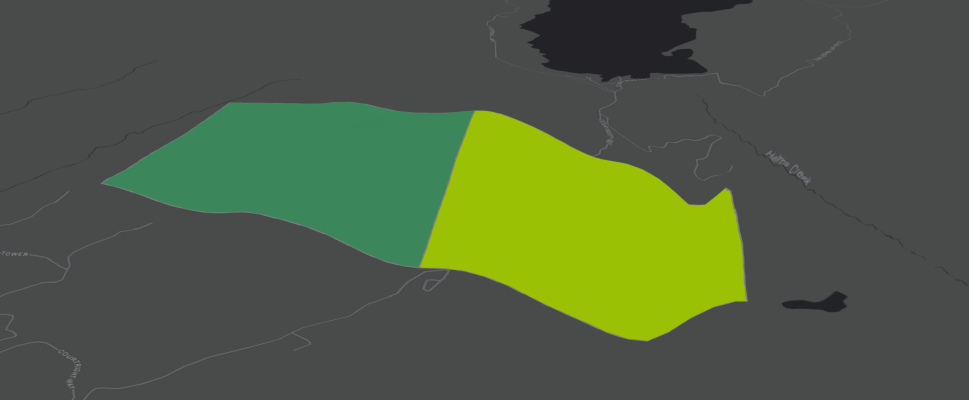

In [21]:
ca_map = gis.map('California, USA', zoomlevel=4, mode="3D")
ca_map.basemap = 'dark-gray'
ca_map.legend = True
ca_map

In [17]:
ca_map.heading, ca_map.tilt, ca_map.zoom, ca_map.extent

(359.99999914622634,
 0.2228539927919941,
 4.000000000000019,
 {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
  'xmin': -18219520.58135718,
  'ymin': 2385930.5577206775,
  'xmax': -8334681.959435612,
  'ymax': 6318510.627361111})

In [20]:
ca_map.clear_graphics()

sdf.spatial.plot(map_widget= ca_map,
                 renderer_type='u',  # for class breaks renderer
                 method='esriClassifyNaturalBreaks',  # classification algorithm
                 class_count=2,  # choose the number of classes
                 col='Pt_Spacing',  # numeric column to classify
                 cmap='prism',  # color map to pick colors from for each class
                 alpha=0.7  # specify opacity
                 )

True

The `point spacing` reported by `Point File Information` is an approximation based on the area of the file's spatial extent divided by the total number of points in the file. It's most reliable when the data is evenly distributed throughout the file, but can otherwise offer misleading results with irregularly distributed data. In this situation, the reported point spacing is more meaningful as a summary when looking at trends for collections of files. However, the tool does offer an option to utilize an improved point spacing estimate for LAS files that mitigates the overestimation caused by irregular data distribution.

Symbolizing the `point spacing` field in the output feature using a `graduated color ramp` can provide a useful overview of trends in the data collection. In the image below, the LAS extent polygons are symbolized in this manner, and the polygons symbolized in red have a higher point density.

You can also review the `classification` of LiDAR points, which is typically performed by the LiDAR data provider. The classification used to distinguish between ground and nonground returns and is maintained using codes in the LAS files. The `Summarize by Class Code` option creates a unique feature for each class code in a LAS file. This provides a means for examining the class codes in each LAS file and the corresponding point information associated with each code. Checking the z-range specifically for a given class of points provides a more accurate representation of the data than if additional classes, like class 7, which represents noise points, were included in the analysis <a href="#References"> [3]</a>.

##### Alternatively, we can also look at the `point file information` per class code:

In [6]:
arcpy.ddd.PointFileInformation(input = lidar_list, 
                               out_feature_class = os.path.join(absolute_gdb_path, "two_las_2"), 
                               in_file_type = "LAS", file_suffix = "las", 
                               input_coordinate_system = "PROJCS['WGS_1984_UTM_Zone_11N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',-117.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]],VERTCS['unknown',VDATUM['unknown'],PARAMETER['Vertical_Shift',0.0],PARAMETER['Direction',1.0],UNIT['Meter',1.0]]", 
                               folder_recursion = "NO_RECURSION", extrude_geometry = "NO_EXTRUSION", 
                               decimal_separator = "DECIMAL_POINT", summarize_by_class_code = "SUMMARIZE", 
                               improve_las_point_spacing = "LAS_SPACING")

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection.gdb\two_las_2'>


In [41]:
sdf2 = pd.DataFrame.spatial.from_featureclass(os.path.join(absolute_gdb_path, "two_las_2"))
sdf2

OID                                           FileName  Class  Pt_Count  \
0    1  NEON_D17_TEAK_DP1_323000_4103000_classified_po...      1    301801   
1    2  NEON_D17_TEAK_DP1_323000_4103000_classified_po...      2   3695279   
2    3  NEON_D17_TEAK_DP1_323000_4103000_classified_po...      5   2851766   
3    4  NEON_D17_TEAK_DP1_323000_4103000_classified_po...      7        52   
4    5  NEON_D17_TEAK_DP1_324000_4103000_classified_po...      1    597904   
5    6  NEON_D17_TEAK_DP1_324000_4103000_classified_po...      2   2971146   
6    7  NEON_D17_TEAK_DP1_324000_4103000_classified_po...      5   1232806   
7    8  NEON_D17_TEAK_DP1_324000_4103000_classified_po...      6     30188   
8    9  NEON_D17_TEAK_DP1_324000_4103000_classified_po...      7        37   

   Pt_Spacing    Z_Min    Z_Max  \
0    1.820268  2505.34  2736.24   
1    0.520202  2504.99  2725.12   
2    0.592160  2507.51  2756.37   
3  128.894594  1382.55  3279.71   
4    1.272494  2324.76  2714.50   
5    0.569360  2324.24  2712.22   
6    0.885864  2327.95  2719.30   
7    5.012413  2377.89  2587.05   
8  133.848011  1393.81  3259.97   

                                               SHAPE  
0  {"rings": [[[323000, 4103000], [323000, 410399...  
1  {"rings": [[[323000, 4103000], [323000, 410399...  
2  {"rings": [[[323000, 4103000], [323000, 410399...  
3  {"rings": [[[323024.95999999996, 4103011.90000...  
4  {"rings": [[[324000, 4103000], [324000, 410399...  
5  {"rings": [[[324000, 4103000], [324000, 410399...  
6  {"rings": [[[324000, 4103000], [324000, 410399...  
7  {"rings": [[[324160.78000000026, 4103061.86999...  
8  {"rings": [[[324026.04000000004, 4103008.26999...

The `summarize option` is useful to statistically summarize information for each class code in the input file but is expensive, as each file must be scanned and analyzed. Also, the `point spacing` reported by `Point File Information` is not exact; it is an estimate. The point spacing given is a summary when looking at trends for collections of files. The tool uses a rough estimate that compares the area of the file's bounding box with the point count. It is most accurate when the rectangular extent of the file being examined is filled with data. Files with points over large water bodies or on the perimeter of a study area, only partially occupied with data, will not produce accurate estimates.

##### Again, visualizing the output feature class of the point file information from the same view point settings

In [20]:
def create_identical_map(map1):
    gis = GIS()
    map2 = gis.map('California, USA', zoomlevel=4, mode="3D")
    map2.basemap = map1.basemap
    map2.heading, map2.tilt, map2.zoom = map1.heading, map1.tilt, map1.zoom
    map2.extent = map1.extent
    map2.legend = map1.legend
    return map2


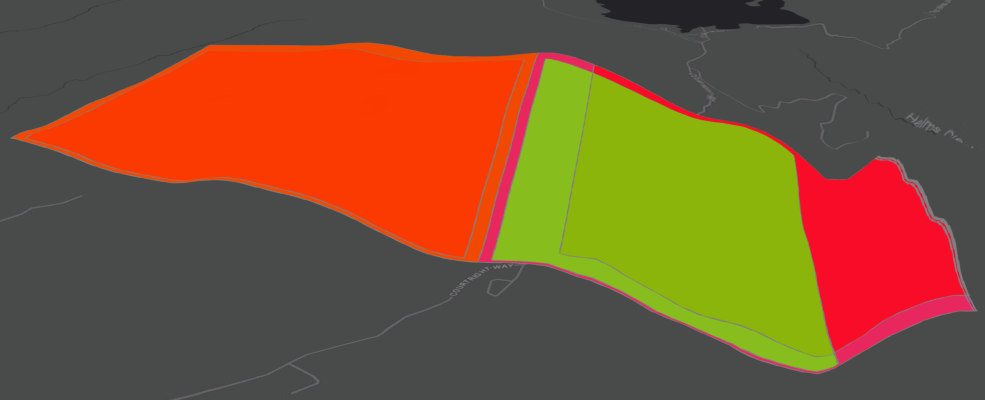

In [26]:
ca_map2 = create_identical_map(ca_map)
ca_map2

In [25]:
sdf2.spatial.plot(map_widget= ca_map2,
                  renderer_type='u',  # for class breaks renderer
                  method='esriClassifyNaturalBreaks',  # classification algorithm
                  class_count=5,  # choose the number of classes
                  col='Pt_Spacing',  # numeric column to classify
                  cmap='prism',  # color map to pick colors from for each class
                  alpha=0.7  # specify opacity
                  )

True

In [58]:
ca_map2.legend = True

Assuming the `Point File Information` review process indicates the data is acceptable, the next step is to use the `LAS Point Statistics As Raster` geoprocessing tool to get a more in-depth view of the point distribution.

### 3.2 Convert to Raster

#### LAS Point Statistics As Raster

The `LAS Point Statistics As Raster` geoprocessing tool allows you to see the spatial distribution of different lidar point metrics <a href="#References"> [3]</a>, which is done by characterizing the points that fall into each cell of an output raster. You can choose to characterize the points in several ways: **Pulse count, Return count, Predominant return count, Maximum returns, Predominant class, Intensity range, and Z-range**. This option is specified using `method` parameter. See below for the explanations of each option, along with other parameters:
  - `method`: The type of statistics collected about the LAS points in each cell of the output raster.
    - PULSE_COUNT — The number of last return points.
    - POINT_COUNT — The number of points from all returns.
    - PREDOMINANT_LAST_RETURN — The most frequent last return value.
    - PREDOMINANT_CLASS — The most frequent class code.
    - INTENSITY_RANGE — The range of intensity values.
    - Z_RANGE — The range of elevation values.
  - `sampling_type`: Specifies the method used for interpreting the Sampling Value to define the resolution of the output raster.
    - OBSERVATIONS — Defines the number of cells that divide the lengthiest side of the LAS dataset extent.
    - CELLSIZE — Defines the cell size of the output raster. This is the default.
  - `sampling_value`: Double. Specifies the value used in conjunction with the Sampling Type to define the resolution of the output raster.

For more, please check the <a href="https://desktop.arcgis.com/en/arcmap/10.3/tools/data-management-toolbox/las-point-statistics-as-raster.htm">help doc</a> of this tool.

##### Pulse Count

Rasterizing the LiDAR points can be done using the `LAS Point Statistics As Raster` geoprocessing tool. Rasterization of the LiDAR points helps aggregate the area covered by the LiDAR points. It provides a good data structure to work with for subsequent steps. You just need to tell the geoprocessing tool what cell assignment type to use and the output cell size. 

You can also evaluate the density for different types of points. While most of the time you'll probably just check the density for all returns, it can be useful to look at those that fall in a certain class. For example, looking at the `pulse count` for ground points can tell you how good your ground penetration is in vegetated areas. You can control what points are used by setting `filtering criteria` of the LAS dataset layer.

Use `PULSE_COUNT` as the Method value for cell assignment. Specify a value for `CELLSIZE` that is several times larger than the average point spacing of the lidar data. Otherwise, you will get a lot of noise because the points are not evenly spaced. From the standpoint of processing efficiency and noise reduction, the larger cell size you use, the better, but there will be a trade-off with the tightness of fit in the result. A good place to start is four times the average point.

In [7]:
absolute_img_path = os.path.join(root_folder, "2017_unclassified_collection", "lidar_pulse.img")

arcpy.management.LasPointStatsAsRaster(in_las_dataset = absolute_lasd_path, 
                                       out_raster = absolute_img_path, 
                                       method = "PULSE_COUNT", 
                                       sampling_type = "CELLSIZE", 
                                       sampling_value = 2)

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\lidar_pulse.img'>


In [2]:
from arcpy import Raster

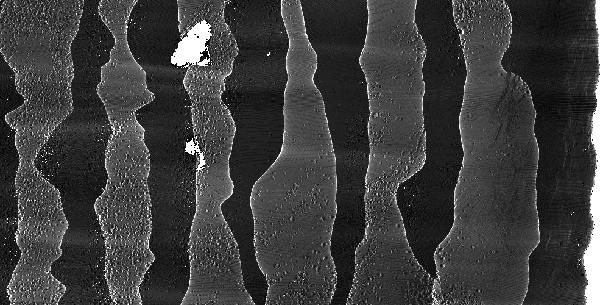

In [4]:
Raster('<Root Folder>\\NEON_lidar-point-cloud-line\\2017_unclassified_collection\\lidar_pulse.img')

For the sake of assessing **point coverage and density**, `pulse count` is a good option. It assigns the number of last returns falling in a cell as the cell value. 
 - First, input a LAS dataset and pick `PULSE_COUNT` as the method. 
 - For sampling, choose `CELLSIZE`. You might think the average point spacing is a good cell size for the output raster, but this typically results in too many empty, or NoData, cells because lidar points are not evenly spaced. Also, the output raster could end up being unnecessarily large. Instead, it's better to go with a cell size that is several times larger than the average point spacing but small enough to identify gaps or voids that warrant further investigation. A reasonable size is **four times** the point spacing. For example, if your data is sampled at 1 meter and you set the cell size to 4, you can expect, on average, to get 16 pulses in a cell.

##### Intensity range

Next, let's switch the method to `intensity range`:

In [9]:
absolute_img_path = os.path.join(root_folder, "2017_unclassified_collection", "lidar_intensity.img")

arcpy.management.LasPointStatsAsRaster(in_las_dataset = absolute_lasd_path, 
                                       out_raster = absolute_img_path, 
                                       method = "INTENSITY_RANGE", 
                                       sampling_type = "CELLSIZE", 
                                       sampling_value = 2)

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\lidar_intensity.img'>


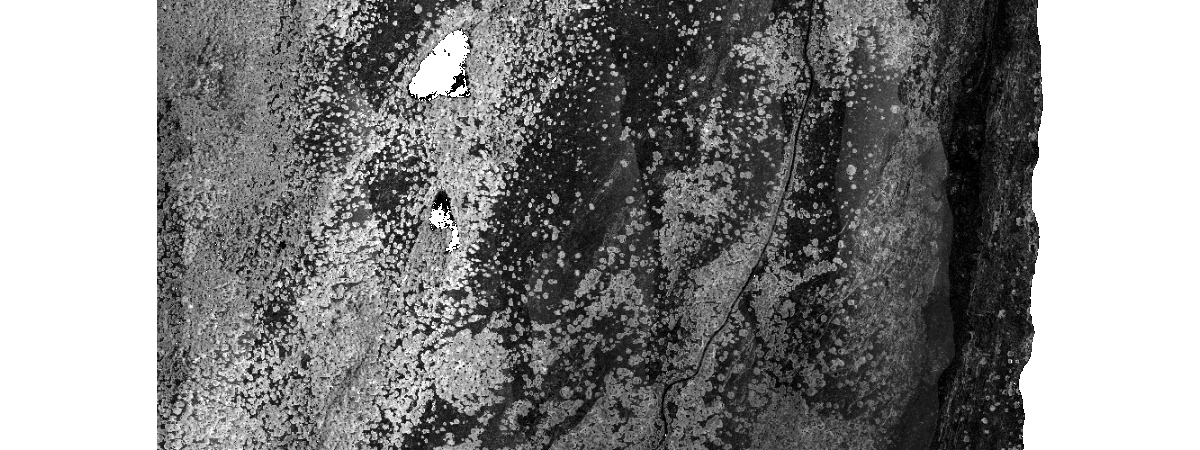

In [62]:
from arcgis.raster import ImageryLayer
intensity_img = ImageryLayer(url="https://datascienceqa.esri.com/server/rest/services/imagey_layer_lidar_intensity_img/ImageServer")
intensity_img

Once your raster has been created, look at it comparatively with the LAS Dataset. Use a color ramp renderer to display it so it is easy to distinguish between cells with high counts and those with low. In the image below, the blue represents areas where density is low, while red represents areas where the lidar sample density is higher.

#### LAS Dataset To Raster

`LiDAR intensity` is recorded as the return strength of a laser beam, and varies with the composition of the surface object reflecting the laser beam. "**A low number indicates low reflectivity while a high number indicates high reflectivity. The intensity of the laser beam return can also be affected by the angle of arrival (scan angle), range, surface composition, roughness, and moisture content.  This means that features under the nadir of the LiDAR sensor usually have higher intensity than the same features along the edges (tilted further), as the returned energy decreases. For these reasons, LiDAR intensity does not always lead to consistent results. It must be used as a relative measurement.  An advantage is that unlike passive vision sensors (cameras), it is indifferent to shadows**".

Intensity of the LiDAR point clouds can be used for numerous applications, including Feature detection and point cloud classification, Land cover classification, Identifying wet areas in forested areas (due to the tendency of the sensor signal to be absorbed by water), and Vegetation classification <a href="#References"> [7]</a>.

The `LAS Dataset To Raster` geoprocessing tool can be set to use the `point intensity` values to produce an image <a href="#References"> [4]</a>. Some of the parameters associated with the tool are listed below:
  - `value_field`: The lidar data that will be used to generate the raster output.
    - ELEVATION — Elevation from the lidar files will be used to create the raster. This is the default.
    - INTENSITY — Intensity information from the lidar files will be used to create the raster.
    - RGB — RGB values from the lidar points will be used to create 3-band imagery.
  - `interpolation_type`: to be input as 
    - "BINNING {cell_assignment_type} {void_fill_method}" or 
    - "TRIANGULATION {interpolation_method} {point_thinning_type} {point_selection_method} {resolution}"
  - `sampling_type`: Specifies the method used for interpreting the Sampling Value to define the resolution of the output raster.
    - OBSERVATIONS — Defines the number of cells that divide the lengthiest side of the LAS dataset extent.
    - CELLSIZE — Defines the cell size of the output raster. This is the default.
  - `z_factor`: The factor by which Z values will be multiplied. This is typically used to convert Z linear units to match XY linear units. The default is 1, which leaves elevation values unchanged.

In [10]:
absolute_raster_path = os.path.join(root_folder, relative_gdb_path， "two_las_raster")

arcpy.conversion.LasDatasetToRaster(in_las_dataset = absolute_lasd_path, 
                                    out_raster = absolute_raster_path,
                                    value_field = "INTENSITY", 
                                    interpolation_type = "BINNING AVERAGE SIMPLE", 
                                    data_type = "INT", 
                                    sampling_type = "CELLSIZE", 
                                    sampling_value = 2, 
                                    z_factor = 1)

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection.gdb\two_las_raster'>


After the tool executes, review the presence of `NoData` areas (shown as black pixels here). Significant numbers of `NoData` cells result if the output cell size you specified is too small relative to the density of the lidar points. You can see `NoData` cells by assigning a color to them for the Symbology of the raster Layer. If there are many `NoData` results, the easiest thing to do is go back and rerun the `LAS Dataset To Raster` tool with a larger cell size.

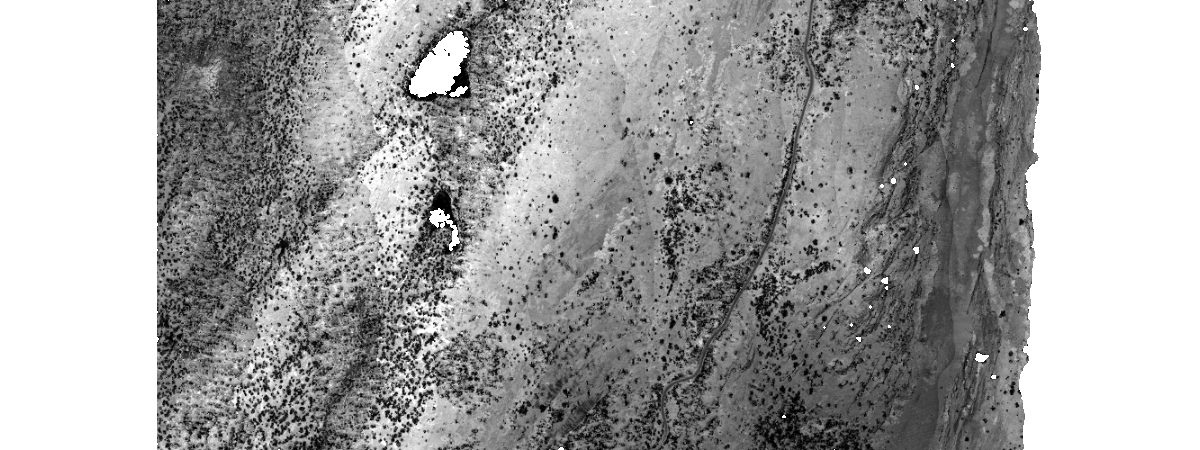

In [63]:
point_intensity_img_lyr = ImageryLayer(url="https://datascienceqa.esri.com/server/rest/services/imagery_layer_two_las_raster/ImageServer")
point_intensity_img_lyr

##### Now let's take a look at the histogram of the point density layer:

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [68]:
density_hist = point_intensity_img_lyr.histograms

In [69]:
x = np.linspace(density_hist[0]['min'], density_hist[0]['max'], num=density_hist[0]['size'])

Text(0, 0.5, 'Number of pixels')

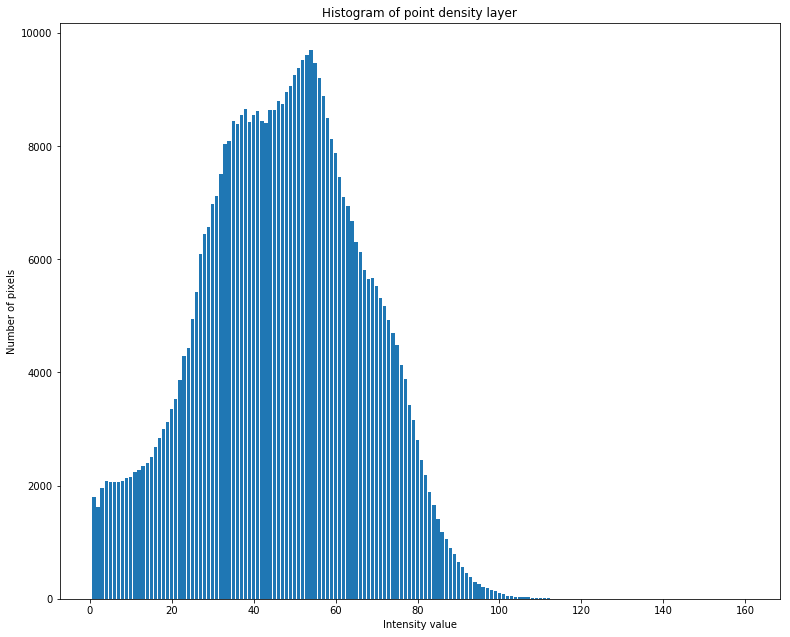

In [71]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,density_hist[0]['counts'])
ax.set_title("Histogram of point density layer")
ax.set_xlabel("Intensity value")
ax.set_ylabel("Number of pixels")

As shown from the histogram above, the majority of the pixels are of intensity values ranging from 40 to 60.

### 3.3 Data area delineation from LiDAR points

It is common for LiDAR or photogrammetric data used in a survey to be delivered without a detailed data area boundary. Often, the x and y extents of the survey area are defined by a tiled system that covers an area of interest, and the data fills these tiles, and the extent of these tiles is a gross approximation of the actual study area boundary. As is often the case, the actual LiDAR data does not fully cover the extent of tiles that are on the perimeter of the project area. The data is only guaranteed to cover some minimal extent, and there is no explicit or absolute boundary other than what can be inferred <a href="#Reference">[8]</a>.

If a surface is made without declaring the data area up front, some of what are actually voids around the perimeter are treated as data areas. Analytic results in these areas are unreliable because height estimates are based on samples that can be far away. For instance, the graphic on the left below depicts a dense collection of LiDAR points shown in green. The gaps in the interior are water bodies (where LiDAR is typically omitted). The irregularly shaped data boundary is easy to see, but unless an explicit extent is provided in the form of a clip polygon, TIN, LAS dataset-, and terrain dataset-related tools will fill in voids, greatly oversimplifying the actual data extent <a href="#Reference">[8]</a>.

<table><tr><td><img src="https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/GUID-E397ABFD-8D1E-4448-B7FC-E6D299FA613E-web.png"></td><td><img src="https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/GUID-625D75E1-BE1E-40D9-B133-611B11190A73-web.png"></td></tr></table>
<h5><center>Fig 1. Problem with data area delineation (Source: <a href="#Reference">[8]</a>)</center></h5>

The solution is to synthesize a data boundary from the points that can be used to enforce a proper interpolation zone in the surface. Steps below will walk you through the process:

#### Step 1: Rasterize the LiDAR points

Rasterization of the LiDAR points helps aggregate the area covered by the LiDAR points. It provides a good data structure to work with for subsequent steps. You just need to tell the geoprocessing tool what cell assignment type to use and the output cell size. This is already done in section 3.2, and we are visualizing the output with the `Raster` module below:

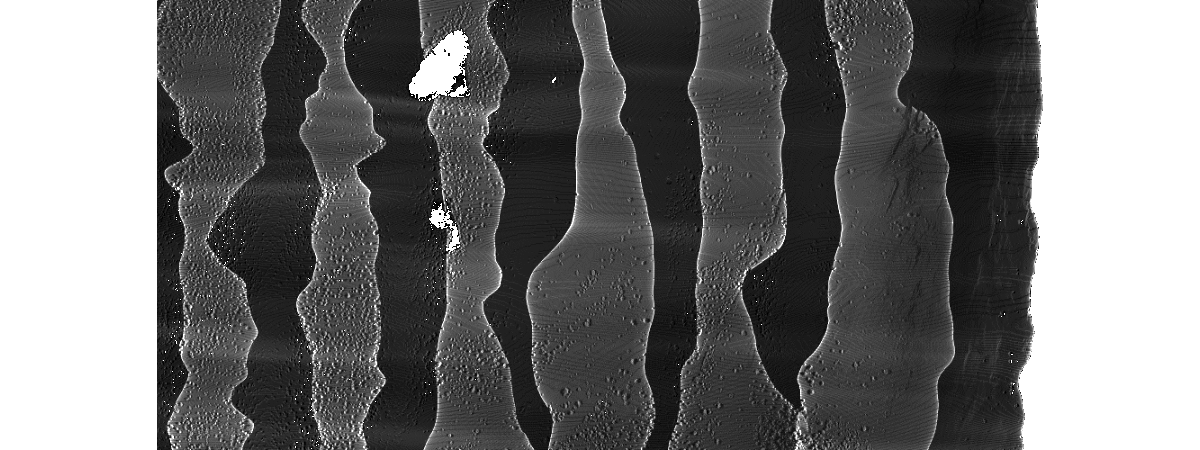

In [26]:
raster_item = portal_gis.content.search("imagery_layer_lidar_pulse_img")[0]
raster_item.layers[0]

#### Step 2: Assign one value to all data cells

Using the `Con` geoprocessing tool in this workflow simply turns any and all data cells of the raster into cells with one value. This value defines a raster zone that will be expanded in step 3. All that is needed is to take the output from the `LAS Point Statistics As Raster` tool and provide a constant value for a positive expression. All nonzero value cells will be considered positive and assigned the constant value. Since `PULSE_COUNT` was used as the cell assignment method during rasterization, any cell with a point in it must have a value greater than zero.

In [ ]:
out_raster = arcpy.ia.Con("lidar_pulse.img", 1, None, ''); 
out_raster.save(r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\con1")

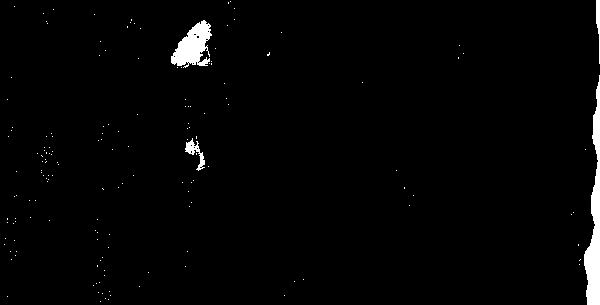

In [5]:
Raster(r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\con1")

#### Step 3: Fill small NoData areas

Unless you used a very coarse cell size relative to your average point spacing, there is a likelihood of many `NoData` cells remaining. Most of these can be eliminated using the `Expand` geoprocessing tool. You want to remove them so the polygon produced during vectorization in a later step is not full of holes. That would be unnecessarily expensive.

In [ ]:
out_raster = arcpy.sa.Expand("con1", 1, [1], "MORPHOLOGICAL"); 
out_raster.save(r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\expand1")

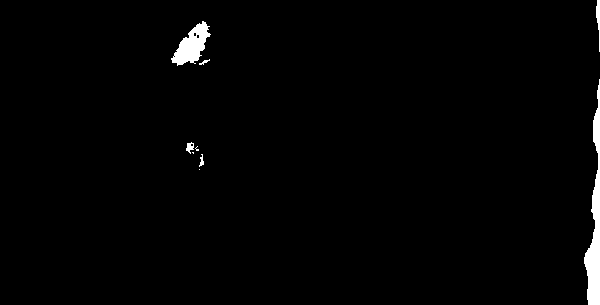

In [6]:
Raster(r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\expand1")

#### Step 4: Reduce the overall extent of data cells

While `Expand` eliminates isolated NoData cells, it also extends the data area outward, so that needs to actually be brought in a little. Clip polygons need to be smaller than the actual point extent, so when terrain datasets or TINs try to estimate z-values along the polygon boundary, points can be found on both sides. This is needed to get good z-value estimates. To reduce the raster's data boundary, use the `Shrink` geoprocessing tool as shown below.

Reduce the extent somewhat so the polygon produced in step 5 is smaller than the actual data extent of the points. This enables the software to estimate better z-values along the polygon boundary.

In [ ]:
out_raster = arcpy.sa.Shrink("expand1", 2, [1], "MORPHOLOGICAL"); 
out_raster.save(r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\shrink1")

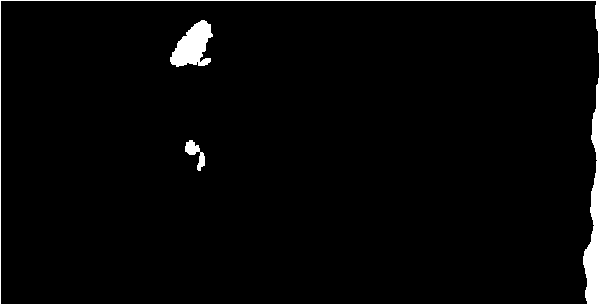

In [7]:
Raster(r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\shrink1")

#### Step 5: Vectorize the raster

The `Raster To Polygon` geoprocessing tool converts the raster to a polygon feature class. Make sure the `Simplify polygons` option is checked. If it is not, the output will be stairstepped rather than smooth and contain more vertices than necessary.

The `Raster To Polygon` tool outputs a polygon feature class. The result is representative of the data extent of the points used at the beginning of the process.

In [ ]:
arcpy.conversion.RasterToPolygon(in_raster = "shrink1", 
                                 out_polygon_features = r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection.gdb\raster_to_polygon1", 
                                 simplify = "SIMPLIFY", 
                                 raster_field = "VALUE", 
                                 create_multipart_features = "SINGLE_OUTER_PART", 
                                 max_vertices_per_feature = None)

In [11]:
sdf3 = pd.DataFrame.spatial.from_featureclass(os.path.join(absolute_gdb_path, "raster_to_polygon1"))


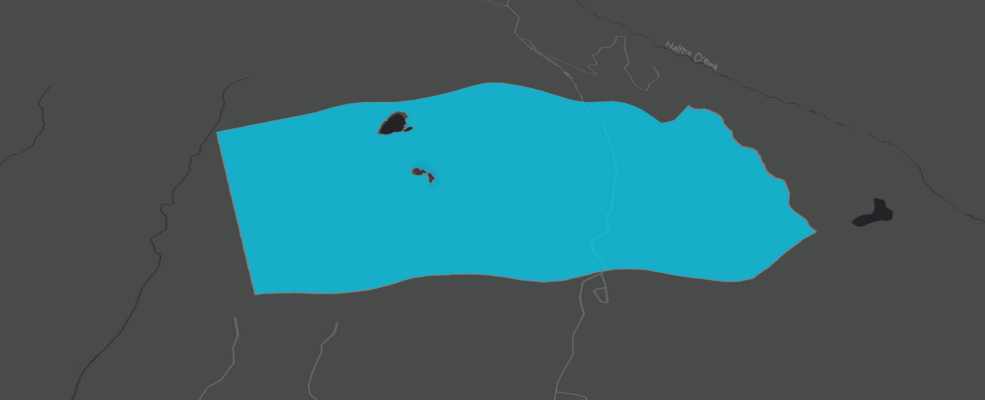

In [18]:
ca_map3 = create_identical_map(ca_map)
ca_map3

In [17]:
sdf3.spatial.plot(map_widget= ca_map3,
                  alpha=0.7  # specify opacity
                  )

True

#### Step 6: Remove any remaining small holes

The `Eliminate Polygon Part` geoprocessing tool eliminates any internal rings, leaving just the exterior boundaries.

In [ ]:
arcpy.management.EliminatePolygonPart("raster_to_polygon1", 
                                      r"<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\2017_survey_collection.gdb\polygon_eliminate1", 
                                      "AREA", "0 SquareMeters", 0, "CONTAINED_ONLY")

In [23]:
sdf4 = pd.DataFrame.spatial.from_featureclass(os.path.join(absolute_gdb_path, "polygon_eliminate1"))


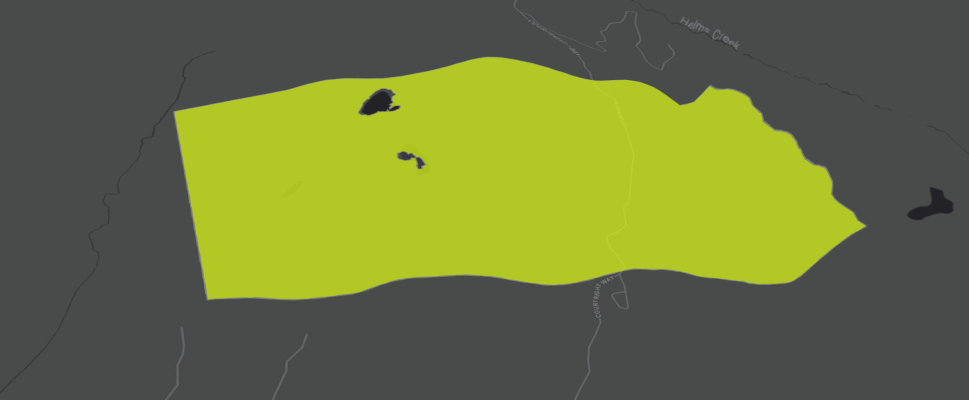

In [25]:
ca_map4 = create_identical_map(ca_map3)
ca_map4

In [24]:
sdf4.spatial.plot(map_widget= ca_map4,
                  alpha=0.7  # specify opacity
                  )

True

In [8]:
print("<Result '<Root Folder>\\NEON_lidar-point-cloud-line\\2017_unclassified_collection\\2017_survey_collection.gdb\\two_las_raster'>")

<Result '<Root Folder>\NEON_lidar-point-cloud-line\2017_unclassified_collection\lidar_pulse.img'>


A clip polygon now exists that can be added to a LAS dataset, terrain dataset, or TIN. It should conform to the data extent of the LiDAR points but fall slightly inside them. The image above shows the resulting clip polygon. Note how it lies slightly inside the source point boundary.

## 4. Summary

In <a>Part 1</a>, we have learned the basic concepts of LiDAR, e.g. what are LiDAR, first return, point clouds and LAS Datasets, then proceeded to <a>Part 1a</a> in which we discussed what LiDAR point clouds look like, and how we can visualize them, and finally arrived at <a>Part 1b</a>, in which we walked through commonly seen use cases with LAS datasets, such as managing, editing, analyzing, visualizing and sharing LiDAR data. We will discuss more advanced topics in the next notebook.

## References

[1] "What is lidar data?", https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/what-is-lidar-data-.htm

[2] "What is a LAS Dataset?", https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/what-is-a-las-dataset-.htm

[3] "Assessing lidar coverage and sample density", https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/lidar-solutions-assessing-lidar-coverage-and-sample-density.htm

[4] "Creating intensity images from lidar in ArcGIS", https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/lidar-solutions-creating-intensity-images-from-lidar.htm

[5] "LAS dataset file structure", https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/file-structure-of-las-datasets.htm

[6] "Working with LAS classification in ArcGIS", https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/working-with-las-classifications-in-arcgis.htm

[7] "LiDAR Intensity: What is it and What are it’s applications?", https://geodetics.com/lidar-intensity-applications/

[8] "Data area delineation from lidar points", https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/lidar-solutions-data-area-delineation-from-lidar-points.htm

<a href="#Table-of-Contents">Back to the Top</a>